# Anyonic models

We solve the almost-bosonic anyon model of https://arxiv.org/pdf/1901.10739.pdf

Iter     Function value   Gradient norm 
     0     8.281454e+01     1.610651e+01
 * time: 0.0044689178466796875
     1     6.099829e+01     9.987416e+00
 * time: 0.01346898078918457
     2     5.554673e+01     1.463010e+01
 * time: 0.03393292427062988
     3     3.978253e+01     9.822358e+00
 * time: 0.06621813774108887
     4     3.067218e+01     8.619396e+00
 * time: 0.09493494033813477
     5     2.812336e+01     7.660710e+00
 * time: 0.1365189552307129
     6     1.343760e+01     3.596510e+00
 * time: 0.1784679889678955
     7     9.526828e+00     1.525476e+00
 * time: 0.21228313446044922
     8     8.243487e+00     2.272458e+00
 * time: 0.2950479984283447
     9     7.714404e+00     1.988640e+00
 * time: 0.3166840076446533
    10     7.048818e+00     3.539619e+00
 * time: 0.3341329097747803
    11     6.594389e+00     1.811864e+00
 * time: 0.3528449535369873
    12     6.225444e+00     1.440972e+00
 * time: 0.37186503410339355
    13     6.056197e+00     1.786263e+00
 * time: 0.3

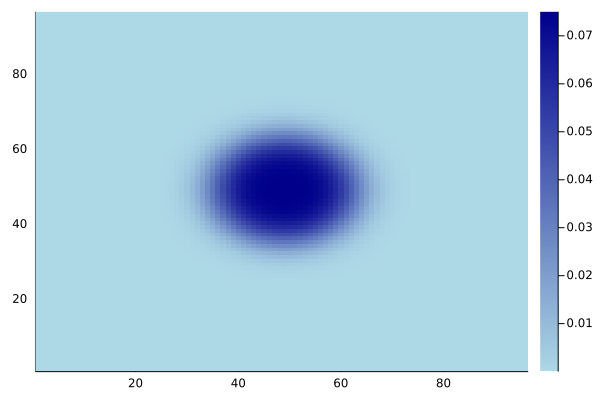

In [1]:
using DFTK
using StaticArrays
using Plots

# Unit cell. Having one of the lattice vectors as zero means a 2D system
a = 14
lattice = a .* [[1 0 0.]; [0 1 0]; [0 0 0]];

# Confining scalar potential
pot(x, y, z) = ((x - a/2)^2 + (y - a/2)^2)

# Parameters
Ecut = 50
n_electrons = 1
β = 5

terms = [Kinetic(2),
         ExternalFromReal(X -> pot(X...)),
         Anyonic(1, β)
]
model = Model(lattice; n_electrons=n_electrons,
              terms=terms, spin_polarization=:spinless)  # "spinless electrons"
basis = PlaneWaveBasis(model; Ecut, kgrid=(1, 1, 1))
scfres = direct_minimization(basis, tol=1e-14)  # Reduce tol for production
E = scfres.energies.total
s = 2
E11 = π/2 * (2(s+1)/s)^((s+2)/s) * (s/(s+2))^(2(s+1)/s) * E^((s+2)/s) / β
println("e(1,1) / (2π)= ", E11 / (2π))
display(heatmap(scfres.ρ[:, :, 1, 1], c=:blues))